## MLFLOW modeling

In [1]:
import pandas as pd

In [ ]:
pip install --upgrade pycaret mlflow

In [2]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [16]:
# Load the data
data = pd.read_csv('blocks.csv')

In [17]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'resale_price', 
          normalize=True,
          feature_selection=True,
          session_id=123,
          log_experiment = True, 
          fold_strategy='kfold',
          experiment_name = 'house_price')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 123521, number of used features: 47
[LightGBM] [Info] Start training from score 479247.390372


,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(176460, 11)"
4,Transformed data shape,"(176460, 3)"
5,Transformed train set shape,"(123521, 3)"
6,Transformed test set shape,"(52939, 3)"
7,Numeric features,4
8,Categorical features,6
9,Preprocess,True


2024/08/10 23:51:28 INFO mlflow.tracking.fluent: Experiment with name 'house_price' does not exist. Creating a new experiment.
2024/08/10 23:51:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Session Initialized fa2b at: http://127.0.0.1:5000/#/experiments/788705631822257855/runs/c402202b5f0f469e8aa358201ecf097f.
2024/08/10 23:51:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/788705631822257855.


In [18]:
# Compare all models and select the best one
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,45591.9196,3740533993.0226,61156.2661,0.8627,0.1251,0.0980,1.6800
et,Extra Trees Regressor,46266.9858,3893735715.0385,62393.9688,0.8571,0.1275,0.0993,1.0600
dt,Decision Tree Regressor,46735.4688,4058568998.6622,63694.9750,0.8510,0.1294,0.1002,0.5230
knn,K Neighbors Regressor,48214.5562,4258182092.8000,65249.3992,0.8437,0.1322,0.1035,0.5570
xgboost,Extreme Gradient Boosting,56201.6980,5542764390.4000,74425.0586,0.7965,0.1495,0.1207,0.8410
catboost,CatBoost Regressor,59325.7673,6147123191.1460,78371.3049,0.7743,0.1566,0.1271,4.1050
lightgbm,Light Gradient Boosting Machine,61024.6808,6489256310.9968,80532.6690,0.7618,0.1603,0.1306,1.0620
gbr,Gradient Boosting Regressor,67670.6291,8059951300.5958,89754.8090,0.7041,0.1766,0.1438,1.0300
lar,Least Angle Regression,85538.8645,12121790972.3079,110003.6957,0.5550,0.2242,0.1859,0.5610
ridge,Ridge Regression,85538.7823,12121791296.3172,110003.6973,0.5550,0.2242,0.1859,0.5000


2024/08/10 23:55:23 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/10 23:55:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Regressor at: http://127.0.0.1:5000/#/experiments/126256135847035074/runs/5ba8778363e4414aab3b11605b591e10.
2024/08/10 23:55:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/126256135847035074.
2024/08/10 23:55:24 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/10 23:55:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Extra Trees Regressor at: http://127.0.0.1:5000/#/experiments/126256135847035074/runs/5750a58923ff4d40b0b5509c87074e2d.
2024/08/10 23:55:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/expe

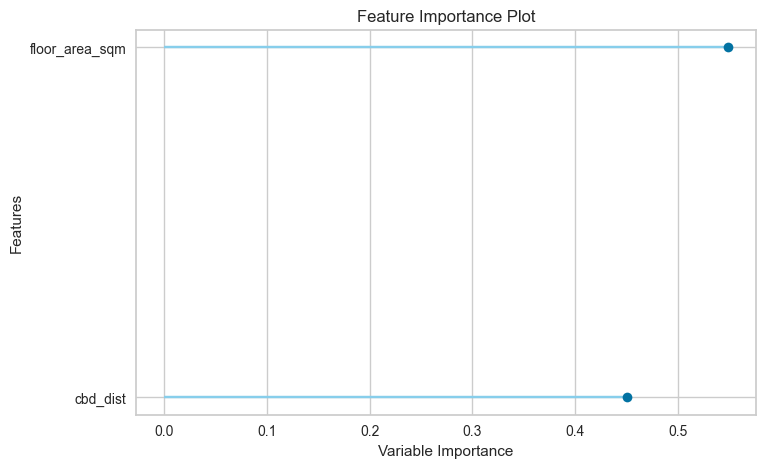

In [6]:
# check feature importance
plot_model(best_model, plot = 'feature')

In [19]:
import mlflow

#Replace with your run id from mlflow localhost website
logged_model = 'runs:/5ba8778363e4414aab3b11605b591e10/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)



In [20]:
# print pipeline
print(loaded_model)
pipeline = loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 5ba8778363e4414aab3b11605b591e10



In [21]:
# finalize the model
final_best = finalize_model(best_model)
#save the model
mlflow.sklearn.save_model(final_best, 'prices')

2024/08/11 00:01:35 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/11 00:01:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Regressor at: http://127.0.0.1:5000/#/experiments/126256135847035074/runs/4fb102ca80574a6daa616b1ad3b16a81.
2024/08/11 00:01:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/126256135847035074.


## Streamlit web app

In [15]:
pip install streamlit


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.7 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.4/8.7 MB 5.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.7 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/8.7 MB 6.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/8.7 MB 6.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.7 MB 6.5 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/8.7 MB 6.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.3/8.7 MB 6.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.6/8.7 MB 6.5 MB/s eta 0:00:01
   ------------- -------------------------- 2.9/8.7 MB 6.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.1/8.7 MB 6.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.4/8.7 MB 6.2 MB/s eta 0:00:01
   ----------------